**Problem Statement:**
- Description:

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.<br>
<br>
Key attributes of the database
The database includes the following indicators:

- `country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]
- `country_long` (text): longer form of the country designation
- `name` (text): name or title of the power plant, generally in Romanized form
- `gppd_idnr` (text): 10 or 12 character identifier for the power plant
- `capacity_mw` (number): electrical generating capacity in megawatts
- `latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
- `longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
- `primary_fuel` (text): energy source used in primary electricity generation or export
- `other_fuel1` (text): energy source used in electricity generation or export
- `other_fuel2` (text): energy source used in electricity generation or export
- `other_fuel3` (text): energy source used in electricity generation or export
- `commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available
- `owner` (text): majority shareholder of the power plant, generally in Romanized form
- `source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form
- `url` (text): web document corresponding to the `source` field
- `geolocation_source` (text): attribution for geolocation information
- `wepp_id` (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.
- `year_of_capacity_data` (number): year the capacity information was reported
- `generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for the year 2013
- `generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for the year 2014
- `generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for the year 2015
- `generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016
- `generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for the year 2017
- `generation_gwh_2018` (number): electricity generation in gigawatt-hours reported for the year 2018
- `generation_gwh_2019` (number): electricity generation in gigawatt-hours reported for the year 2019
- `generation_data_source` (text): attribution for the reported generation information
- `estimated_generation_gwh_2013` (number): estimated electricity generation in gigawatt-hours for the year 2013
- `estimated_generation_gwh_2014` (number): estimated electricity generation in gigawatt-hours for the year 2014 
- `estimated_generation_gwh_2015` (number): estimated electricity generation in gigawatt-hours for the year 2015 
- `estimated_generation_gwh_2016` (number): estimated electricity generation in gigawatt-hours for the year 2016 
- `estimated_generation_gwh_2017` (number): estimated electricity generation in gigawatt-hours for the year 2017 
- 'estimated_generation_note_2013` (text): label of the model/method used to estimate generation for the year 2013
- `estimated_generation_note_2014` (text): label of the model/method used to estimate generation for the year 2014 
- `estimated_generation_note_2015` (text): label of the model/method used to estimate generation for the year 2015
- `estimated_generation_note_2016` (text): label of the model/method used to estimate generation for the year 2016
- `estimated_generation_note_2017` (text): label of the model/method used to estimate generation for the year 2017 
- Fuel Type Aggregation
- We define the "Fuel Type" attribute of our database based on common fuel categories. 

### Prediction :   
Make two prediction:
- 1) Primary Fuel   
- 2) capacity_mw 

In [320]:
## Importing required liabraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
pd.set_option('max_columns', None)
warnings.filterwarnings('ignore')

In [321]:
data=pd.read_csv('database_IND.csv')
## Saving a copy of the original dataset
data_copy=data

data.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner,source,url,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,NaN,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,NaN,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2018.0,631.777928,617.789264,843.747,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,NaN,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,Central Electricity Authority,NaN


In [322]:
data.shape

(908, 25)

In [323]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   908 non-null    object 
 1   country_long              908 non-null    object 
 2   name                      908 non-null    object 
 3   gppd_idnr                 908 non-null    object 
 4   capacity_mw               908 non-null    float64
 5   latitude                  862 non-null    float64
 6   longitude                 862 non-null    float64
 7   primary_fuel              908 non-null    object 
 8   other_fuel1               199 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        528 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    908 non-null    object 
 14  url       

Based on general observation of the dataset, we will drop following columns:
- country_long
- name
- gppd_idnr
- owner 
- source
- url
- wepp_id
- generation_data_source
- other_fuel1  
- other_fuel2 
- other_fuel3
- estimated_generation_gwh

**Above features either stores no important information or have most of the data missing**

In [324]:
data['year_of_capacity_data'].value_counts()

2018.0    520
Name: year_of_capacity_data, dtype: int64

In [325]:
data['country'].value_counts()

IND    908
Name: country, dtype: int64

**We will also drop 'year_of_capacity_data' and 'country' as they only store single value**

In [326]:
data.drop(['country_long','name','gppd_idnr','owner','source','url','wepp_id','generation_data_source','other_fuel1','other_fuel2','other_fuel3','estimated_generation_gwh','year_of_capacity_data','country'],axis=1,inplace=True)

In [327]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   capacity_mw          908 non-null    float64
 1   latitude             862 non-null    float64
 2   longitude            862 non-null    float64
 3   primary_fuel         908 non-null    object 
 4   commissioning_year   528 non-null    float64
 5   geolocation_source   889 non-null    object 
 6   generation_gwh_2013  384 non-null    float64
 7   generation_gwh_2014  401 non-null    float64
 8   generation_gwh_2015  425 non-null    float64
 9   generation_gwh_2016  437 non-null    float64
 10  generation_gwh_2017  443 non-null    float64
dtypes: float64(9), object(2)
memory usage: 78.2+ KB


- Now, we have 8 features and 908 observations.
- 'primary_fuel' (object type) and 'capacity_mw' (numeric) are our targets

- Following two features have object type data:
 - country
 - geolocation_source

In [328]:
data.isnull().sum()

capacity_mw              0
latitude                46
longitude               46
primary_fuel             0
commissioning_year     380
geolocation_source      19
generation_gwh_2013    524
generation_gwh_2014    507
generation_gwh_2015    483
generation_gwh_2016    471
generation_gwh_2017    465
dtype: int64

**Following columns have missing data:**
- latitude                   :- 46
- longitude                  :- 46
- commissioning_year        :- 380
- geolocation_source         :- 19
- generation_gwh_2013       :- 524
- generation_gwh_2014       :- 507
- generation_gwh_2015       :- 483
- generation_gwh_2016       :- 471
- generation_gwh_2017       :- 465

### Missing Value imputations

- Replacing NaNs in 'generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016' by their respective mean values


In [329]:
for i in data[['generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017']]:
    data[i].fillna(data[i].mean(),inplace=True)

- Replacing NaNs in 'commissioning_year' and 'geolocation_source' by the modes of those replective columns

In [330]:
data['commissioning_year'].fillna(2013.0,inplace=True)

In [331]:
data['geolocation_source'].replace(np.nan,'WRI',inplace=True)

- Replacing NaNs in 'latitude' and 'loggitude' by random non-null values in those replective columns

In [332]:
import random
data['latitude'].fillna(random.choice(data[data['latitude'] != np.nan]['latitude']), inplace =True)

In [333]:
data['longitude'].fillna(random.choice(data['longitude'][data['longitude'].notna()]), inplace=True)

In [334]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   capacity_mw          908 non-null    float64
 1   latitude             908 non-null    float64
 2   longitude            908 non-null    float64
 3   primary_fuel         908 non-null    object 
 4   commissioning_year   908 non-null    float64
 5   geolocation_source   908 non-null    object 
 6   generation_gwh_2013  908 non-null    float64
 7   generation_gwh_2014  908 non-null    float64
 8   generation_gwh_2015  908 non-null    float64
 9   generation_gwh_2016  908 non-null    float64
 10  generation_gwh_2017  908 non-null    float64
dtypes: float64(9), object(2)
memory usage: 78.2+ KB


In [335]:
data.isna().sum()

capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
commissioning_year     0
geolocation_source     0
generation_gwh_2013    0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
dtype: int64

**Successfully treated all the missing values in the data**

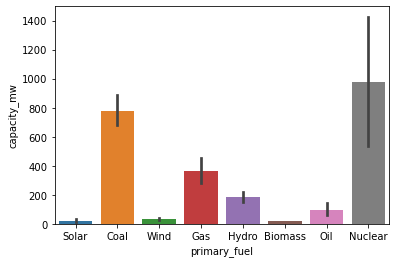

In [336]:
sns.barplot(x='primary_fuel',y='capacity_mw',data=data)

**Majority of power generation is fuelled by 'Nuclear' and 'Coal' fuels**

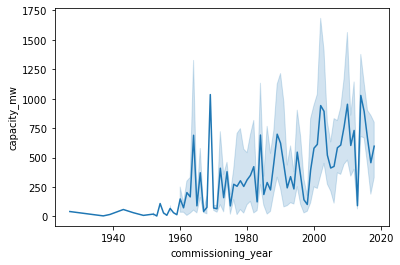

In [337]:
sns.lineplot(x='commissioning_year',y='capacity_mw',data=data)

### Checking for skewness and outliers

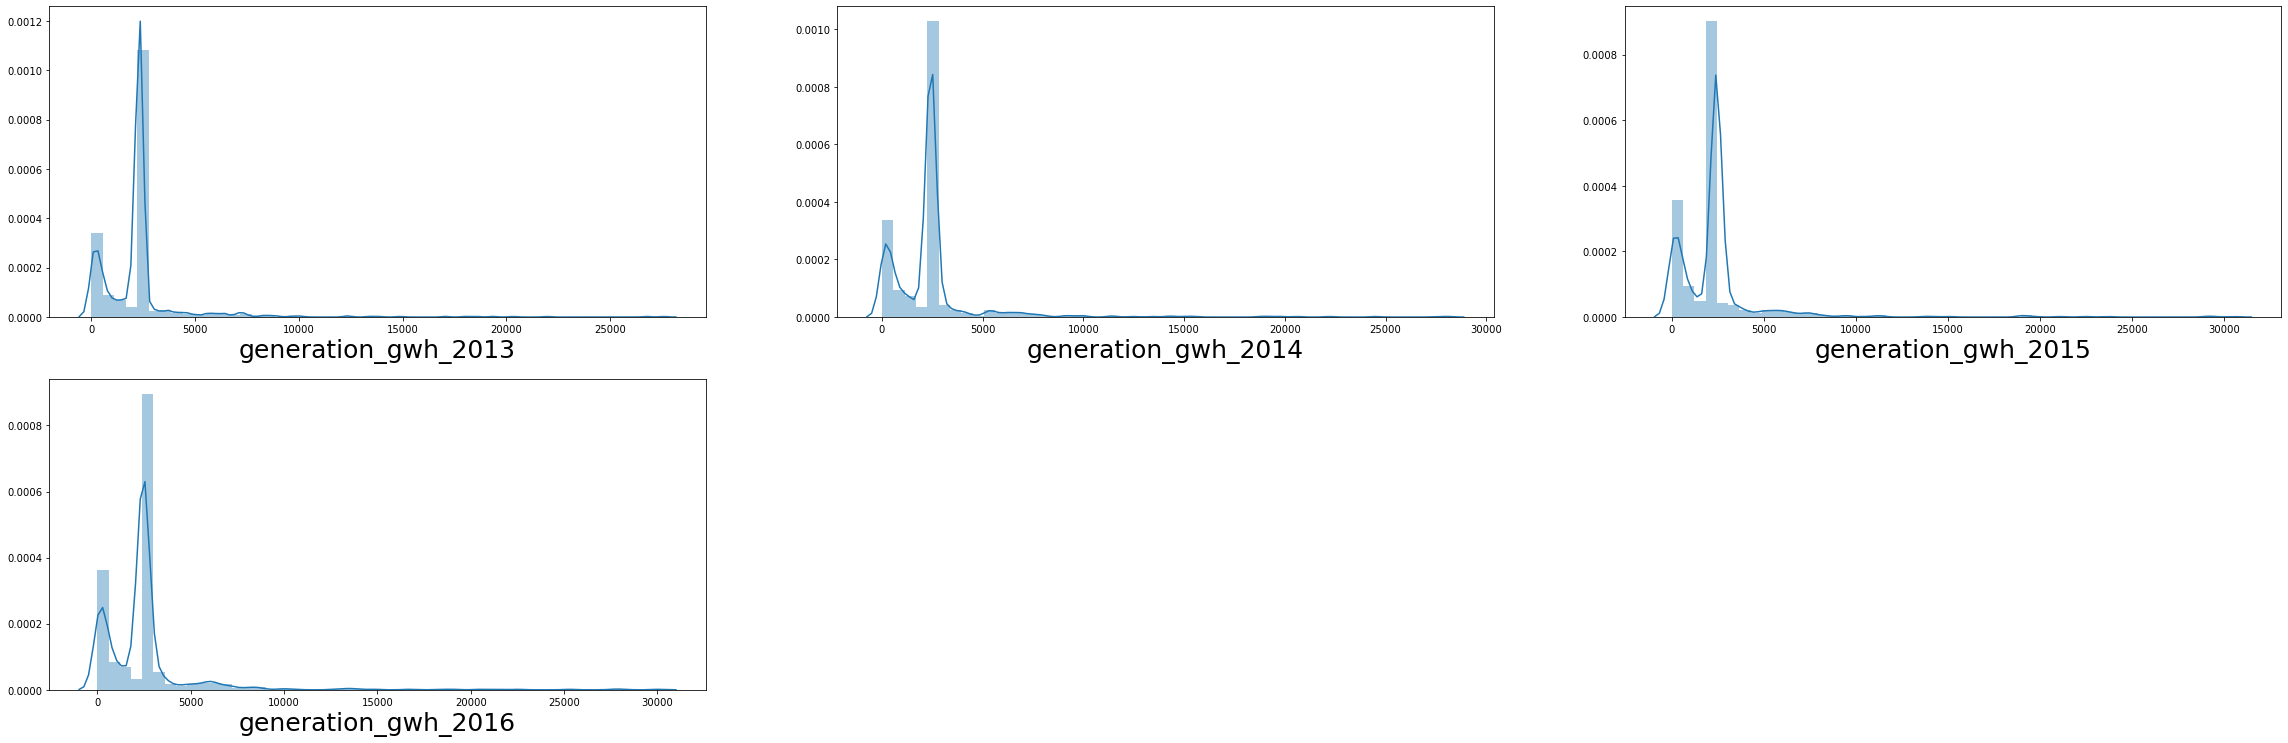

In [338]:
cont_feat=data[['generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016']]
plt.figure(figsize=(40,40))
plot_number=1

for i in cont_feat:
    if plot_number<18:
        ax=plt.subplot(6,3,plot_number)
        sns.distplot(cont_feat[i])
        plt.xlabel(i,fontsize=25)
    plot_number+=1

In [339]:
cont_feat.skew()

generation_gwh_2013    5.241491
generation_gwh_2014    5.041961
generation_gwh_2015    5.367370
generation_gwh_2016    5.071758
dtype: float64

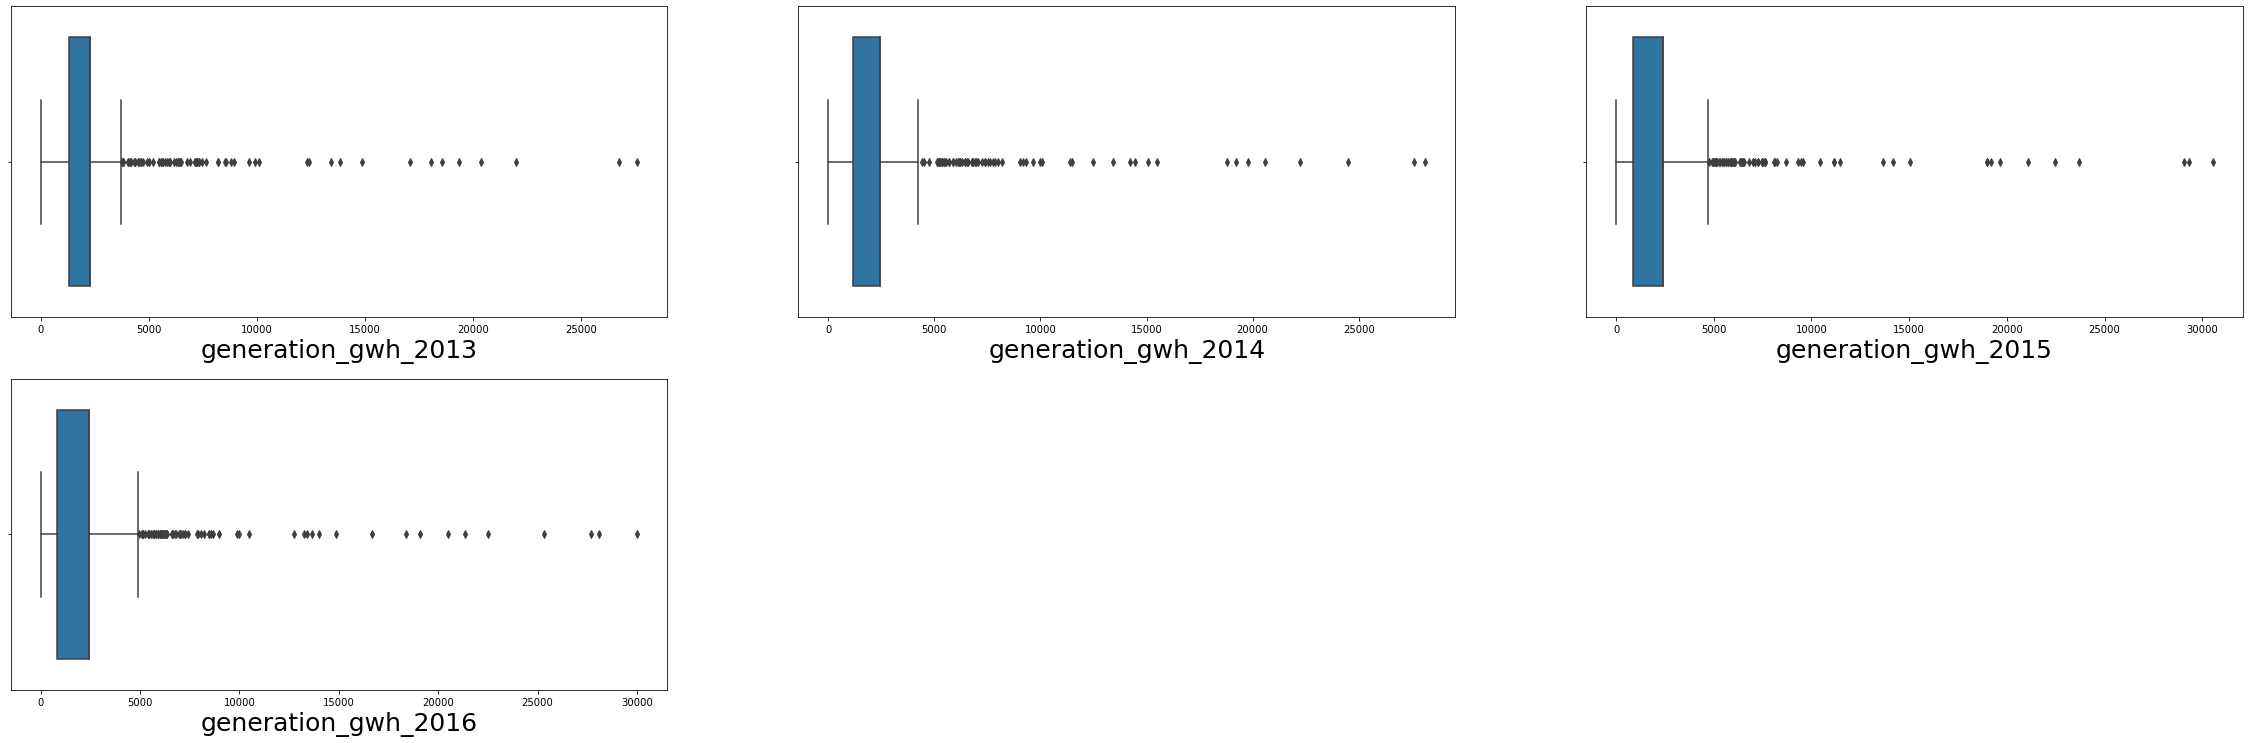

In [340]:
cont_feat=data[['generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016']]
plt.figure(figsize=(40,40))
plot_number=1

for i in cont_feat:
    if plot_number<18:
        ax=plt.subplot(6,3,plot_number)
        sns.boxplot(cont_feat[i])
        plt.xlabel(i,fontsize=25)
    plot_number+=1

In [341]:
# rejecting data beyond 3 std to manage skewness and outliers
from scipy.stats import zscore

z_score=zscore(cont_feat)
abs_z_score=np.abs(z_score)

filtering_entry=(abs_z_score<3).all(axis=1)
data=data[filtering_entry]

data.shape

(890, 11)

In [342]:
cont_feat.skew()

generation_gwh_2013    5.241491
generation_gwh_2014    5.041961
generation_gwh_2015    5.367370
generation_gwh_2016    5.071758
dtype: float64

In [343]:
for i in data[['generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016']]:
    if data.skew().loc[i]>0.5:
        data[i]=np.sqrt(data[i])

In [344]:
data[['generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016']].skew()

generation_gwh_2013   -0.465132
generation_gwh_2014   -0.479213
generation_gwh_2015   -0.440114
generation_gwh_2016   -0.393898
dtype: float64

- Successfully treated the outliers and the skewness in continuous features

**Encoding the object type data**

In [345]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

a=['primary_fuel','commissioning_year','geolocation_source']

for i in a:
    data[i]=le.fit_transform(data[i])

In [346]:
data.head()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,2.5,28.1839,73.2407,6,65,1,48.000617,49.197493,49.133210,49.537221,2531.754458
1,98.0,24.7663,74.6090,1,67,2,48.000617,49.197493,49.133210,49.537221,2531.754458
2,39.2,21.9038,69.3732,7,67,2,48.000617,49.197493,49.133210,49.537221,2531.754458
3,135.0,23.8712,91.3602,2,58,2,25.135193,24.855367,29.047323,29.765827,663.774500
4,1800.0,21.9603,82.4091,1,69,2,40.844706,55.095826,76.917943,79.012657,5385.579736


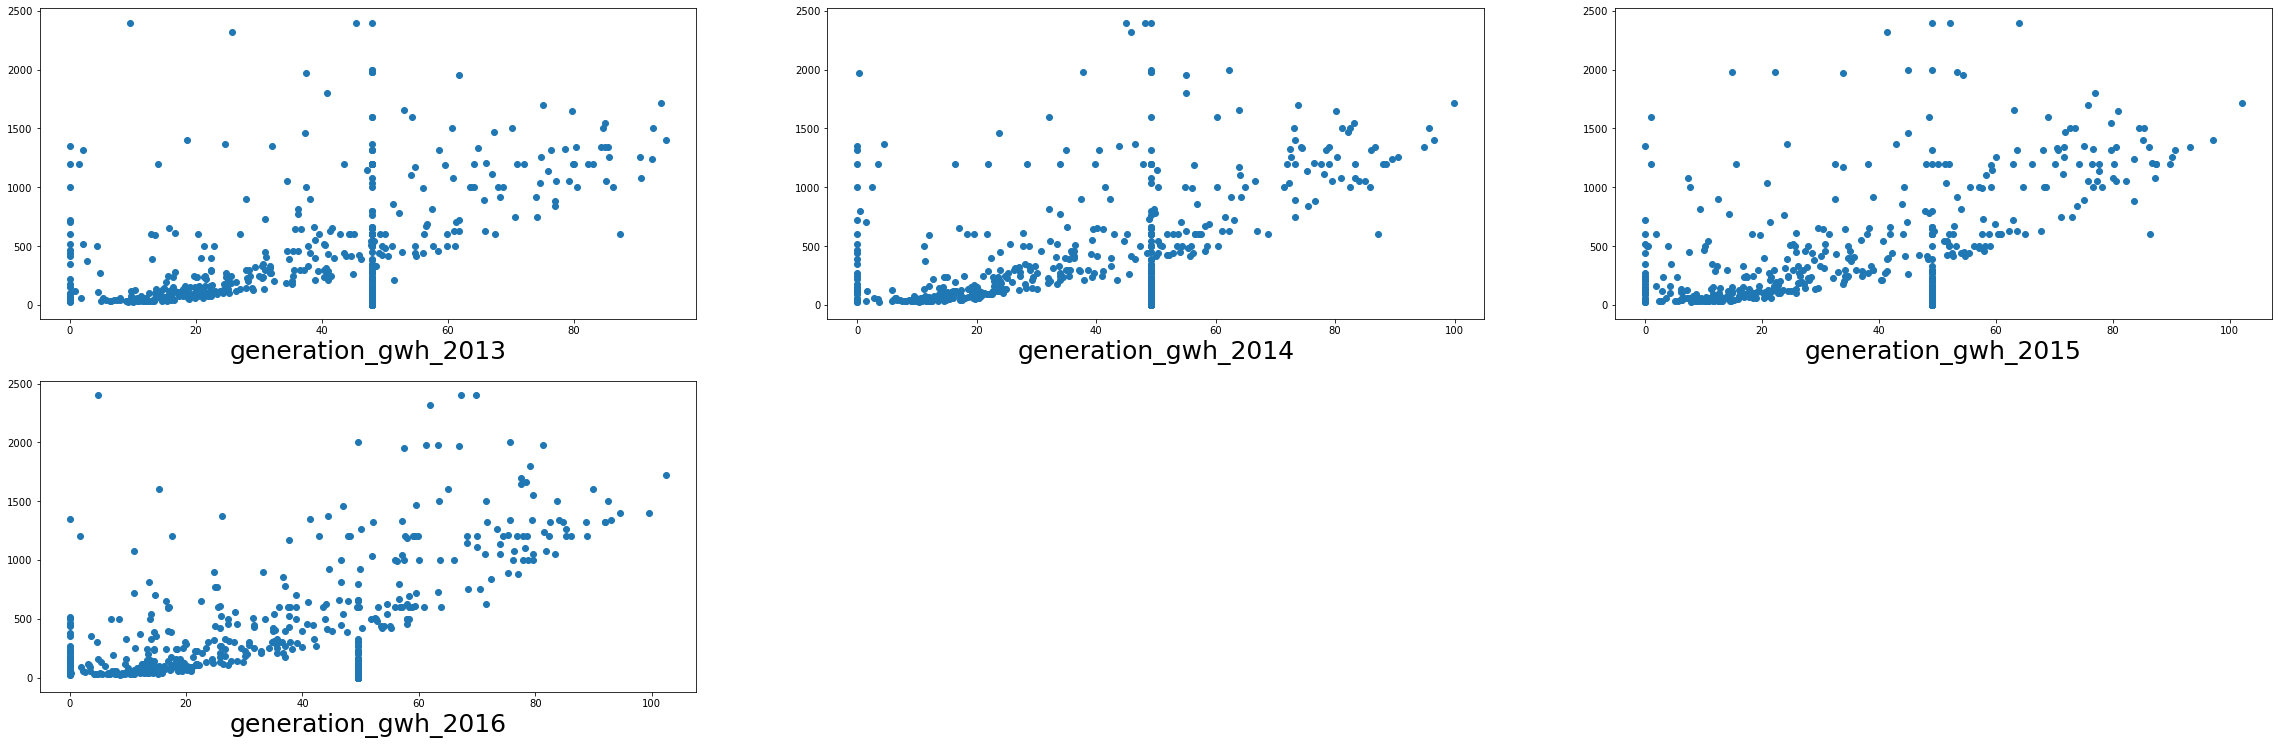

In [347]:
cont_feat=data[['generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016']]
plt.figure(figsize=(40,40))
plot_number=1

for i in cont_feat:
    if plot_number<18:
        ax=plt.subplot(6,3,plot_number)
        plt.scatter(cont_feat[i],data['capacity_mw'])
        plt.xlabel(i,fontsize=25)
    plot_number+=1


- All four continuous features show somewhat linear relationship with the target

In [348]:
data.corrwith(data['capacity_mw'])

capacity_mw            1.000000
latitude               0.042294
longitude              0.172182
primary_fuel          -0.395124
commissioning_year     0.020269
geolocation_source     0.228139
generation_gwh_2013    0.247250
generation_gwh_2014    0.250230
generation_gwh_2015    0.270136
generation_gwh_2016    0.332579
generation_gwh_2017    0.537928
dtype: float64

- 'primary_fuel', 'generation_gwh_2016', 'generation_gwh_2017' show moderate relationship with the target
- 'latitude','commissioning_year' show very weak relationship with the target

<font color='red'>
             
# Regression analysis for 'capacity_mw' prediction

In [349]:
Xr=data.drop('capacity_mw',axis=1)
yr=data['capacity_mw']

**Scaling the features**

In [350]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [351]:
Xr=scaler.fit_transform(Xr)

**Splitting the data into training and testing sets**

In [352]:
from sklearn.model_selection import train_test_split

In [353]:
Xr_train,Xr_test,yr_train,yr_test=train_test_split(Xr,yr,test_size=0.2,random_state=42)

**Importing regression performance metrics**

In [354]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import cross_val_score

## Model 1: Linear Regression

In [355]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [356]:
lr.fit(Xr_train,yr_train)

LinearRegression()

In [358]:
y_lr=lr.predict(Xr_test)

In [359]:
lr_score=r2_score(yr_test,y_lr)
lr_score

0.5305480738445486

In [360]:
lr_rmse=np.sqrt(mean_squared_error(yr_test,y_lr))
lr_rmse

333.0428302774909

In [361]:
lr_rmae=np.sqrt(mean_absolute_error(yr_test,y_lr))
lr_rmae

14.927565260055536

In [363]:
lr_cvs=cross_val_score(lr,Xr,yr,cv=5).mean()
lr_cvs

0.4246879066513582

## Model 2: KNN Regressor

In [385]:
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor(n_neighbors=5)

In [386]:
knr.fit(Xr_train,yr_train)

KNeighborsRegressor()

In [387]:
y_knr=knr.predict(Xr_test)

In [388]:
knr_score=r2_score(yr_test,y_knr)
knr_score

0.7717981430257073

In [389]:
knr_rmse=np.sqrt(mean_squared_error(yr_test,y_knr))
knr_rmse

232.2010145973077

In [390]:
knr_rmae=np.sqrt(mean_absolute_error(yr_test,y_knr))
knr_rmae

10.280436367689475

In [397]:
knr_cvs=cross_val_score(knr,Xr,yr,cv=5).mean()
knr_cvs

0.6703778428469027

## Model 3: SVR

In [391]:
from sklearn.svm import SVR
svr=SVR()

In [392]:
svr.fit(Xr_train,yr_train)

SVR()

In [393]:
y_svr=svr.predict(Xr_test)

In [394]:
svr_score=r2_score(yr_test,y_svr)
svr_score

-0.1832715987575153

In [398]:
svr_rmse=np.sqrt(mean_squared_error(yr_test,y_svr))
svr_rmse

528.7455755120017

In [399]:
svr_rmae=np.sqrt(mean_absolute_error(yr_test,y_svr))
svr_rmae

16.13158376567782

In [400]:
svr_cvs=cross_val_score(svr,Xr,yr,cv=5).mean()
svr_cvs

-0.1885708440081403

## Model 4: Random Forest Regressor

In [401]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()

In [402]:
rfr.fit(Xr_train,yr_train)

RandomForestRegressor()

In [403]:
y_rfr=rfr.predict(Xr_test)

In [404]:
rfr_score=r2_score(yr_test,y_rfr)
rfr_score

0.8110966203414351

In [405]:
rfr_rmse=np.sqrt(mean_squared_error(yr_test,y_rfr))
rfr_rmse

211.26346083025902

In [406]:
rfr_rmae=np.sqrt(mean_absolute_error(yr_test,y_rfr))
rfr_rmae

9.799427377878482

In [407]:
rfr_cvs=cross_val_score(rfr,Xr,yr,cv=5).mean()
rfr_cvs

0.7542819660593887

## Model 5: Gradient Boosting Regressor

In [408]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()

In [409]:
gbr.fit(Xr_train,yr_train)

GradientBoostingRegressor()

In [411]:
y_gbr=gbr.predict(Xr_test)

In [412]:
gbr_score=r2_score(yr_test,y_gbr)
gbr_score

0.7942531803740617

In [413]:
gbr_rmse=np.sqrt(mean_squared_error(yr_test,y_gbr))
gbr_rmse

220.48096007581228

In [414]:
gbr_rmae=np.sqrt(mean_absolute_error(yr_test,y_gbr))
gbr_rmae

9.96883350692626

In [415]:
gbr_cvs=cross_val_score(gbr,Xr,yr,cv=5).mean()
gbr_cvs

0.7103538897450405

**Saving performance metrics of all models in single dataframe**

In [418]:
metrics=pd.DataFrame()
metrics['Model']=['Linear Regressor','KNN Regressor','SVR','RandomForest Regressor','GradientBoosting Regressor']
metrics['R2 Score']=[lr_score,knr_score,svr_score,rfr_score,gbr_score]
metrics['Cross Val Score']=[lr_cvs,knr_cvs,svr_cvs,rfr_cvs,gbr_cvs]
metrics['RMSE']=[lr_rmse,knr_rmse,svr_rmse,rfr_rmse,gbr_rmse]
metrics['RMAE']=[lr_rmae,knr_rmae,svr_rmae,rfr_rmae,gbr_rmae]

metrics

,Model,R2 Score,Cross Val Score,RMSE,RMAE
0,Linear Regressor,0.530548,0.424688,333.042830,14.927565
1,KNN Regressor,0.771798,0.670378,232.201015,10.280436
2,SVR,-0.183272,-0.188571,528.745576,16.131584
3,RandomForest Regressor,0.811097,0.754282,211.263461,9.799427
4,GradientBoosting Regressor,0.794253,0.710354,220.480960,9.968834


**Based on the above table, Random Forest Regressor is our best model**

## Tunning the hyperparameters of the best model

In [419]:
from sklearn.model_selection import GridSearchCV

In [420]:
rfr_grid={'n_estimators': [80,100,120],
          'criterion': ['mse', 'mae'],
          'min_samples_split': [2,4,5,6],
          'min_samples_leaf': [1,2,3],
          'max_leaf_nodes': [4,10,None]}

In [421]:
gridCV=GridSearchCV(rfr,param_grid=rfr_grid,n_jobs=-1)

In [422]:
gridCV.fit(Xr_train,yr_train)

GridSearchCV(estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ['mse', 'mae'],
                         'max_leaf_nodes': [4, 10, None],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 4, 5, 6],
                         'n_estimators': [80, 100, 120]})

In [423]:
gridCV.best_params_

{'criterion': 'mae',
 'max_leaf_nodes': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [424]:
rfr_best=RandomForestRegressor(criterion='mae',max_leaf_nodes=None,min_samples_leaf=1,min_samples_split=2,n_estimators=100)

In [425]:
rfr_best.fit(Xr_train,yr_train)

RandomForestRegressor(criterion='mae')

In [427]:
y_best=rfr_best.predict(Xr_test)

In [428]:
best_score=r2_score(yr_test,y_best)
best_score

0.8140525500209559

In [429]:
best_rmse=np.sqrt(mean_squared_error(yr_test,y_best))
best_rmse

209.60403531351992

In [430]:
best_rmae=np.sqrt(mean_absolute_error(yr_test,y_best))
best_rmae

9.696922971353313

In [431]:
best_cvs=cross_val_score(rfr_best,Xr,yr,cv=5).mean()
best_cvs

0.756802589170176

Text(0.5, 1.0, 'Actual vs Predicted')

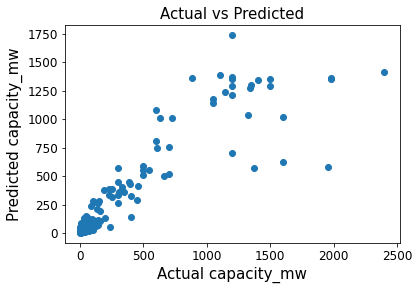

In [432]:
parameters = {'ytick.labelsize': 12,
          'xtick.labelsize': 12,'axes.labelsize': 15,
          'axes.titlesize': 15}
plt.rcParams.update(parameters)



plt.scatter(yr_test,y_best)
plt.xlabel('Actual capacity_mw')
plt.ylabel('Predicted capacity_mw')
plt.title('Actual vs Predicted')

In [433]:
pred_capacity_mw=y_best

**Printing the prediction**

In [434]:
pred_capacity_mw

array([  10.512  ,   35.759  ,  757.054  ,   26.7559 ,   15.6356 ,
       1145.7    ,  407.36   ,   18.5108 ,  518.07977,   18.4185 ,
          9.47   ,   64.7585 ,   96.5271 ,   49.6417 ,   13.865  ,
         38.8323 ,   45.601  ,   89.379  , 1372.3124 ,   72.4354 ,
         28.538  ,  705.292  ,   61.838  , 1294.204  , 1357.0308 ,
         26.7505 ,  112.4661 ,  141.5937 ,   28.3    , 1740.6708 ,
         73.5885 ,   23.992  ,  132.9938 ,  434.70316, 1418.405  ,
        330.27114,   36.235  ,    3.6    ,   41.1475 ,    7.69   ,
         13.322  ,   18.893  ,   35.96   ,   20.042  ,   69.94   ,
         27.6635 , 1356.325  ,  358.81199,  591.01441,   53.4045 ,
       1010.6858 , 1182.8    ,    5.52   ,   44.688  ,   53.632  ,
        104.6115 , 1278.7    ,   27.6042 ,   71.2975 ,  113.363  ,
         18.4185 ,  281.7863 ,  329.18884,   17.266  ,  106.3054 ,
         75.321  ,   32.4555 ,   75.051  ,  453.11215,  580.498  ,
        624.59258,   11.096  ,   50.9842 ,   34.456  , 1009.84

### Saving the best regression model for 'capacity_mw' prediction

In [435]:
import pickle
filename='capacity_mw_rfr.pkl'
pickle.dump(rfr_best,open(filename,'wb'))

<font color='red'>
             
# Classification analysis for 'primary_fuel' prediction

**Checking the relationship between features and target**

In [569]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [571]:
selectbest=SelectKBest(score_func=f_classif,k=11)
selectbest.fit(data,data['primary_fuel'])

SelectKBest(k=11)

In [572]:
scores_df=pd.DataFrame(selectbest.scores_)
column_df=pd.DataFrame(data.columns)

In [573]:
feature_scores=pd.concat([column_df,scores_df],axis=1) # Concating two DFs
feature_scores.columns=['Features','Scores'] # Naming the columns
feature_scores.nlargest(11,'Scores')

,Features,Scores
3,primary_fuel,inf
5,geolocation_source,2640.273973
4,commissioning_year,93.798712
0,capacity_mw,60.627612
9,generation_gwh_2016,49.801271
7,generation_gwh_2014,44.506928
10,generation_gwh_2017,43.695378
8,generation_gwh_2015,42.572675
6,generation_gwh_2013,41.201496
2,longitude,24.808333


- 'geolocation_source' show strong relationship with the target
- Other features show weak relationship with the target

**Seperating features and the label**

In [438]:
Xc=data.drop('primary_fuel',axis=1)
yc=data['primary_fuel']

**Scaling the features**

In [439]:
Xc=scaler.fit_transform(Xc)

**Splitting the data into training and testing sets**

In [457]:
Xc_train,Xc_test,yc_train,yc_test=train_test_split(Xc,yc,test_size=0.25,random_state=42)

**Importing the classification performance metrics**

In [458]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve,plot_roc_curve
from sklearn.model_selection import cross_val_score

## Model 1: AdaBoostClassifier

In [525]:
from sklearn.ensemble import AdaBoostClassifier
abc=AdaBoostClassifier()

In [526]:
abc.fit(Xc_train,yc_train)

AdaBoostClassifier()

In [527]:
y_abc=abc.predict(Xc_test)

In [528]:
abc_score=accuracy_score(yc_test,y_abc)
abc_score

0.484304932735426

In [529]:
abc_cvs=cross_val_score(abc,Xc,yc,cv=5).mean()
abc_cvs

0.5337078651685394

In [530]:
print(confusion_matrix(yc_test,y_abc))

[[ 0  0  0 10  0  0  0  0]
 [ 0 17  0 42  0  0  0  0]
 [ 0  1  0 13  0  0  0  0]
 [ 0  4  0 61  0  0  0  0]
 [ 0  0  0  2  0  0  0  0]
 [ 0  0  0  6  0  0  0  0]
 [ 0  1  0  1  0  0 30  0]
 [ 0  0  0 35  0  0  0  0]]


In [531]:
print(classification_report(yc_test,y_abc))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.74      0.29      0.41        59
           2       0.00      0.00      0.00        14
           3       0.36      0.94      0.52        65
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         6
           6       1.00      0.94      0.97        32
           7       0.00      0.00      0.00        35

    accuracy                           0.48       223
   macro avg       0.26      0.27      0.24       223
weighted avg       0.44      0.48      0.40       223



## Model 2: KNeighborsClassifier

In [466]:
from sklearn.neighbors import KNeighborsClassifier
knc=KNeighborsClassifier()

In [467]:
knc.fit(Xc_train,yc_train)

KNeighborsClassifier()

In [468]:
y_knc=knc.predict(Xc_test)

In [469]:
knc_score=accuracy_score(yc_test,y_knc)
knc_score

0.8026905829596412

In [470]:
knc_cvs=cross_val_score(knc,Xc,yc,cv=5).mean()
knc_cvs

0.7808988764044944

In [471]:
print(confusion_matrix(yc_test,y_knc))

[[ 6  3  0  0  0  0  0  1]
 [ 1 53  1  4  0  0  0  0]
 [ 0  3  8  3  0  0  0  0]
 [ 0  8  3 54  0  0  0  0]
 [ 0  2  0  0  0  0  0  0]
 [ 0  2  2  1  0  1  0  0]
 [ 0  0  0  0  0  0 30  2]
 [ 5  3  0  0  0  0  0 27]]


In [472]:
print(classification_report(yc_test,y_knc))

              precision    recall  f1-score   support

           0       0.50      0.60      0.55        10
           1       0.72      0.90      0.80        59
           2       0.57      0.57      0.57        14
           3       0.87      0.83      0.85        65
           4       0.00      0.00      0.00         2
           5       1.00      0.17      0.29         6
           6       1.00      0.94      0.97        32
           7       0.90      0.77      0.83        35

    accuracy                           0.80       223
   macro avg       0.69      0.60      0.61       223
weighted avg       0.81      0.80      0.80       223



## Model 3: SVC

In [475]:
from sklearn.svm import SVC
svc=SVC()

In [476]:
svc.fit(Xc_train,yc_train)

SVC()

In [478]:
y_svc=svc.predict(Xc_test)

In [479]:
svc_score=accuracy_score(yc_test,y_svc)
svc_score

0.7533632286995515

In [480]:
svc_cvs=cross_val_score(svc,Xc,yc,cv=5).mean()
svc_cvs

0.7157303370786516

In [481]:
print(confusion_matrix(yc_test,y_svc))

[[ 0  2  0  0  0  0  0  8]
 [ 0 49  2  4  0  0  0  4]
 [ 0  4  2  6  0  0  0  2]
 [ 0  7  0 58  0  0  0  0]
 [ 0  2  0  0  0  0  0  0]
 [ 0  1  1  2  0  0  0  2]
 [ 0  2  0  0  0  0 30  0]
 [ 0  6  0  0  0  0  0 29]]


In [482]:
print(classification_report(yc_test,y_svc))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.67      0.83      0.74        59
           2       0.40      0.14      0.21        14
           3       0.83      0.89      0.86        65
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         6
           6       1.00      0.94      0.97        32
           7       0.64      0.83      0.73        35

    accuracy                           0.75       223
   macro avg       0.44      0.45      0.44       223
weighted avg       0.69      0.75      0.71       223



## Model 4: Random Forest Classifier

In [484]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()

In [485]:
rfc.fit(Xc_train,yc_train)

RandomForestClassifier()

In [486]:
y_rfc=rfc.predict(Xc_test)

In [487]:
rfc_score=accuracy_score(yc_test,y_rfc)
rfc_score

0.8340807174887892

In [550]:
rfc_cvs=cross_val_score(rfc,Xc,yc,cv=5).mean()
rfc_cvs

0.8247191011235955

In [489]:
print(confusion_matrix(yc_test,y_rfc))

[[ 7  1  0  0  0  0  0  2]
 [ 2 51  3  1  0  1  0  1]
 [ 0  2  6  5  0  1  0  0]
 [ 0  6  1 58  0  0  0  0]
 [ 0  2  0  0  0  0  0  0]
 [ 0  1  3  0  0  2  0  0]
 [ 0  0  0  0  0  0 30  2]
 [ 0  3  0  0  0  0  0 32]]


In [490]:
print(classification_report(yc_test,y_rfc))

              precision    recall  f1-score   support

           0       0.78      0.70      0.74        10
           1       0.77      0.86      0.82        59
           2       0.46      0.43      0.44        14
           3       0.91      0.89      0.90        65
           4       0.00      0.00      0.00         2
           5       0.50      0.33      0.40         6
           6       1.00      0.94      0.97        32
           7       0.86      0.91      0.89        35

    accuracy                           0.83       223
   macro avg       0.66      0.63      0.64       223
weighted avg       0.83      0.83      0.83       223



## Model 5: AdaBoost Classifier

In [507]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()

In [508]:
gbc.fit(Xc_train,yc_train)

GradientBoostingClassifier()

In [509]:
y_gbc=gbc.predict(Xc_test)

In [510]:
gbc_score=accuracy_score(yc_test,y_gbc)
gbc_score

0.8251121076233184

In [511]:
gbc_cvs=cross_val_score(gbc,Xc,yc,cv=5).mean()
gbc_cvs

0.802247191011236

In [512]:
print(confusion_matrix(yc_test,y_gbc))

[[ 5  3  0  0  0  0  0  2]
 [ 0 54  1  1  0  2  0  1]
 [ 0  3  7  3  0  1  0  0]
 [ 0  6  0 58  0  1  0  0]
 [ 0  2  0  0  0  0  0  0]
 [ 0  1  3  0  0  1  0  1]
 [ 0  0  0  0  0  0 31  1]
 [ 1  6  0  0  0  0  0 28]]


In [513]:
print(classification_report(yc_test,y_gbc))

              precision    recall  f1-score   support

           0       0.83      0.50      0.62        10
           1       0.72      0.92      0.81        59
           2       0.64      0.50      0.56        14
           3       0.94      0.89      0.91        65
           4       0.00      0.00      0.00         2
           5       0.20      0.17      0.18         6
           6       1.00      0.97      0.98        32
           7       0.85      0.80      0.82        35

    accuracy                           0.83       223
   macro avg       0.65      0.59      0.61       223
weighted avg       0.82      0.83      0.82       223



**Storing metrics for all models in single daraframe**

In [551]:
metrics=pd.DataFrame()
metrics['Model']=['ADAboost Classifier','KNN Classifier','SVC','RandomForest Classifier','GradientBoosting Classifier']
metrics['Accuracy Score']=[abc_score,knc_score,svc_score,rfc_score,gbc_score]
metrics['Cross Val Score']=[abc_cvs,knc_cvs,svc_cvs,rfc_cvs,gbc_cvs]

metrics

,Model,Accuracy Score,Cross Val Score
0,ADAboost Classifier,0.484305,0.533708
1,KNN Classifier,0.802691,0.780899
2,SVC,0.753363,0.715730
3,RandomForest Classifier,0.834081,0.824719
4,GradientBoosting Classifier,0.825112,0.802247


**Based on the above metrics comparision, Random Forest classifier is our best model**

## Tuning the hyperparameters of the best model

In [535]:
from sklearn.model_selection import GridSearchCV

In [536]:
rf_grid={'criterion':['gini','entropy'],
         'min_samples_split':[2,4,6],
         'min_samples_leaf':[1,2,3,5],
         'n_estimators':[80,100,120]}

In [538]:
gridCV=GridSearchCV(rfc,param_grid=rf_grid,n_jobs=-1)

In [539]:
gridCV.fit(Xc_train,yc_train)

GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_leaf': [1, 2, 3, 5],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [80, 100, 120]})

In [540]:
gridCV.best_params_

{'criterion': 'gini',
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 120}

In [544]:
rfc_best=RandomForestClassifier(criterion='gini',min_samples_leaf=1,min_samples_split=4,n_estimators=120)

In [545]:
rfc_best.fit(Xc_train,yc_train)

RandomForestClassifier(min_samples_split=4, n_estimators=120)

In [564]:
yc_best=rfc_best.predict(Xc_test)

In [565]:
best_score=accuracy_score(yc_test,yc_best)
best_score

0.8430493273542601

In [559]:
best_cvs=cross_val_score(rfc_best,Xc,yc,cv=5).mean()
best_cvs

0.8280898876404494

In [566]:
print(confusion_matrix(yc_test,yc_best))

[[ 7  1  0  0  0  0  0  2]
 [ 1 52  2  2  0  1  0  1]
 [ 0  2  6  5  0  1  0  0]
 [ 0  4  1 60  0  0  0  0]
 [ 0  2  0  0  0  0  0  0]
 [ 0  1  3  0  0  2  0  0]
 [ 0  0  0  0  0  0 30  2]
 [ 2  2  0  0  0  0  0 31]]


In [567]:
print(classification_report(yc_test,yc_best))

              precision    recall  f1-score   support

           0       0.70      0.70      0.70        10
           1       0.81      0.88      0.85        59
           2       0.50      0.43      0.46        14
           3       0.90      0.92      0.91        65
           4       0.00      0.00      0.00         2
           5       0.50      0.33      0.40         6
           6       1.00      0.94      0.97        32
           7       0.86      0.89      0.87        35

    accuracy                           0.84       223
   macro avg       0.66      0.64      0.64       223
weighted avg       0.83      0.84      0.84       223



**Printing predictions for 'primary_fuel'**

In [568]:
pred_primary_fuel=yc_best
pred_primary_fuel

array([6, 7, 3, 3, 3, 1, 3, 0, 2, 7, 6, 0, 3, 5, 7, 1, 7, 1, 1, 1, 0, 1,
       6, 1, 1, 0, 3, 3, 6, 1, 1, 1, 3, 3, 1, 3, 2, 6, 3, 6, 6, 0, 6, 6,
       3, 7, 1, 2, 1, 7, 1, 1, 6, 1, 0, 3, 1, 1, 1, 3, 7, 3, 3, 6, 3, 3,
       7, 3, 2, 1, 1, 6, 1, 7, 1, 7, 3, 3, 7, 1, 1, 2, 3, 3, 7, 7, 7, 6,
       7, 3, 3, 3, 1, 3, 1, 1, 3, 7, 7, 3, 1, 0, 1, 3, 1, 1, 3, 2, 7, 6,
       3, 1, 1, 1, 3, 5, 3, 1, 1, 5, 1, 1, 7, 3, 3, 3, 3, 3, 7, 3, 3, 3,
       6, 7, 1, 2, 3, 3, 1, 6, 0, 6, 1, 2, 1, 7, 6, 6, 3, 6, 1, 3, 1, 7,
       1, 1, 3, 6, 3, 3, 7, 1, 3, 2, 3, 1, 1, 2, 3, 1, 6, 5, 1, 6, 1, 6,
       2, 1, 7, 6, 7, 3, 1, 6, 1, 3, 7, 3, 1, 3, 7, 1, 3, 3, 1, 1, 1, 3,
       7, 7, 7, 0, 3, 7, 7, 3, 7, 6, 3, 3, 2, 6, 1, 7, 3, 3, 6, 0, 3, 1,
       3, 6, 7])

## Saving our best model

In [563]:
import pickle
filename='PrimaryFuel_RFC.pkl'
pickle.dump(rfc_best,open(filename,'wb'))